# 1- gold-price-prediction-linear-regression

Use the "Run" button to execute the code.

In [1]:
print('Hello World')

Hello World


In [2]:
import numpy as np 
import pandas as pd

In [3]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

In [4]:
# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [7]:
# yahoo finance is used to fetch data
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 59 kB 4.8 MB/s             
     |████████████████████████████████| 114 kB 17.4 MB/s            
     |████████████████████████████████| 132 kB 75.2 MB/s            
     |████████████████████████████████| 112 kB 79.5 MB/s            
     |████████████████████████████████| 502 kB 65.9 MB/s            
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [8]:
# Read data
df = yf.download('GLD', '2008-01-01', '2022-03-16', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [9]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-09,186.039993,187.229996,184.759995,185.820007,26839700
2022-03-10,186.880005,187.380005,184.990005,186.399994,18455200
2022-03-11,183.740005,185.779999,183.440002,185.089996,14824700
2022-03-14,183.029999,183.289993,181.949997,182.300003,13186400
2022-03-15,179.100006,180.270004,178.009995,178.889999,16962300


In [10]:
# Only keep close columns
df = df[['Close']]

In [12]:
# Drop rows with missing values
df = df.dropna()

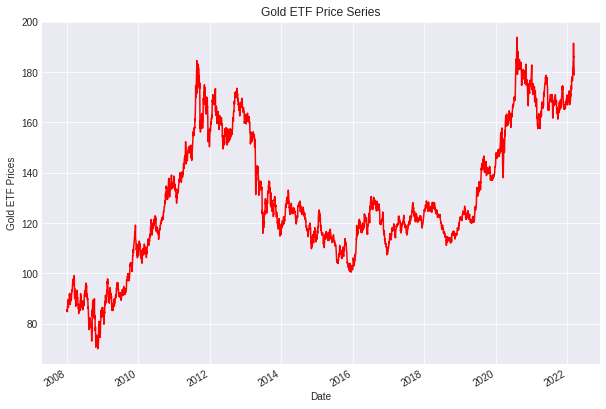

In [13]:
# Plot the closing price of GLD
df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [15]:
# Define explanatory variables
df['S_3'] = df['Close'].rolling(window=3).mean()
df['S_9'] = df['Close'].rolling(window=9).mean()
df['next_day_price'] = df['Close'].shift(-1)

In [16]:
df.head()

,Close,S_3,S_9,next_day_price
Date,,,,
2008-01-02,84.860001,NaN,NaN,85.570000
2008-01-03,85.570000,NaN,NaN,85.129997
2008-01-04,85.129997,85.186666,NaN,84.769997
2008-01-07,84.769997,85.156665,NaN,86.779999
2008-01-08,86.779999,85.559998,NaN,86.550003


In [17]:
df = df.dropna()
X = df[['S_3', 'S_9']]

In [18]:
# Define dependent variable
y = df['next_day_price']

In [19]:
# Split the data into train and test dataset
t = .8
t = int(t*len(df))

In [20]:
# Train dataset
X_train = X[:t]
y_train = y[:t]

In [21]:
# Test dataset
X_test = X[t:]
y_test = y[t:]

In [22]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.20 * 9 Days Moving Average (x2) + 0.44 (constant)


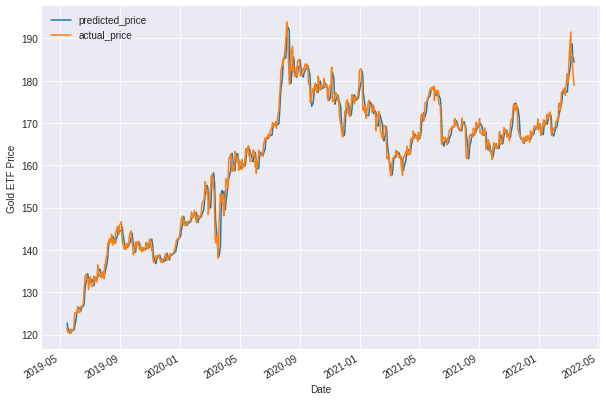

In [23]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [24]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

98.2